In [1]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import keras
import numpy as np
from tqdm import tqdm

from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import glob, os
import PIL.Image

import csv
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [4]:
import csv

images = []
elos = []

with open('/content/drive/My Drive/Generated Images/image.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        if row[2] == "f":
          images.append(row[0])
          elos.append(row[1])

print(images)
print(elos)

['p-1595534853.630988', 'p-1595534961.358644', 'p-1595532164.179338', 'p-1595535196.387671', 'p-1595534323.046717', 'p-1595534437.098345', 'p-1595532069.337625', 'p-1595532028.881686', 'p-1595534825.743948', 'p-1595532902.150686', 'p-1595532973.821134', 'p-1595533584.038633', 'p-1595534749.604625', 'p-1595533757.364826', 'p-1595534556.357363', 'p-1595533405.496014', 'p-1595535170.844591', 'p-1595532812.420884', 'p-1595534183.092287', 'p-1595532318.824006', 'p-1595535058.651056', 'p-1595533904.811982', 'p-1595534807.612129', 'p-1595533883.742407', 'p-1595534946.685618', 'p-1595533589.479844', 'p-1595532469.216357', 'p-1595532390.669085', 'p-1595533640.19628', 'p-1595532341.310596', 'p-1595532226.06622', 'p-1595532173.296463', 'p-1595533999.738313', 'p-1595535138.896913', 'p-1595535311.33148', 'p-1595533509.235699', 'p-1595534060.153684', 'p-1595533565.297115', 'p-1595534291.848506', 'p-1595532447.953139', 'p-1595534674.737492', 'p-1595532697.382799', 'p-1595532590.053157', 'p-1595534707

In [5]:
print(len(elos))

1632


In [ ]:
path = '/content/drive/My Drive/Generated Images/vecs/'
valid_images = ".npy"
vectors = []
for file in tqdm(images):
    vec = np.load(path + file + ".npy")
    vectors.append(vec)

vectors = np.array(vectors)#.reshape(-1,128,128,3)
elos = np.array(elos).astype(np.float)

In [11]:
vectors = np.array(vectors)#.reshape(-1,128,128,3)
elos = np.array(elos).astype(np.float)

In [ ]:
np.save('/content/drive/My Drive/Generated Images/vecs_combined.npy', vectors)

In [12]:
vectors = np.load('/content/drive/My Drive/Generated Images/vecs_combined.npy')

In [13]:
vectors = vectors.reshape(-1, 512)
print(vectors.shape)

(1632, 512)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
vecsPCA = pca.fit_transform(vectors)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(elos.reshape(-1,1))
elos_scaled = scaler.transform(elos.reshape(-1,1))

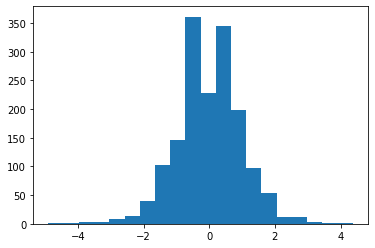

-2.1769078914218755e-17


In [232]:
import matplotlib.pyplot as plt

plt.hist(elos_scaled, bins = 20)
plt.show()

print(np.mean(elos_scaled))

In [121]:
(trainX, testX, trainY, testY) = train_test_split(vectors, elos_scaled, test_size=0.2, random_state=42)

In [19]:
print(trainX)

[[ 1.23684549  0.42353694 -1.01001605 ...  1.48244017  1.06113806
  -0.44588541]
 [ 0.15713157 -0.69370653  1.82941307 ... -2.22805009  1.30176343
   0.57557569]
 [ 0.41101982  0.82926288  0.2773068  ... -1.18451994  0.32692662
   1.05128393]
 ...
 [-1.02875648 -1.72820494 -0.50480645 ...  2.69430414  0.66855121
   0.1587326 ]
 [-0.87250512 -0.45720249  0.68693799 ...  0.07700557 -0.00627578
  -0.08065343]
 [-0.39623639 -0.23915602 -0.44787301 ...  1.32078959  0.04956764
  -2.02120947]]


In [234]:
model = Sequential()
#model.add(keras.layers.Conv2D(4, [3,3], activation='relu', padding='same'))
#model.add(keras.layers.Conv2D(8, [3,3], activation='relu', padding='same'))
#model.add(keras.layers.Conv2D(16, [3,3], activation='relu', padding='same'))

model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer="l2", activity_regularizer="l2", bias_regularizer="l2"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer="l2"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(16, activation='relu', kernel_regularizer="l2", activity_regularizer="l2", bias_regularizer="l1"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(8, activation='relu', kernel_regularizer="l2", activity_regularizer="l2"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))

#model.add(keras.layers.Dense(16, activation='relu', kernel_regularizer="l2"))

#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(8, activation='relu', kernel_regularizer="l2"))
model.add(keras.layers.Dense(1))

In [240]:
opt = keras.optimizers.Adam(0.0001)
model.compile(loss="mean_absolute_error", optimizer=opt, metrics=['mse'])

In [241]:
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=500, batch_size=128)
#train_mse = model.evaluate(trainX, trainY, verbose=0)
#test_mse = model.evaluate(testX, testY, verbose=0)

Train on 1305 samples, validate on 327 samples
Epoch 1/500
1305/1305 [==============================] - 2s 2ms/step - loss: 0.7751 - mse: 1.0175 - val_loss: 0.7518 - val_mse: 0.9298
Epoch 2/500
1305/1305 [==============================] - 0s 95us/step - loss: 0.7744 - mse: 1.0176 - val_loss: 0.7504 - val_mse: 0.9298
Epoch 3/500
1305/1305 [==============================] - 0s 108us/step - loss: 0.7738 - mse: 1.0176 - val_loss: 0.7495 - val_mse: 0.9298
Epoch 4/500
1305/1305 [==============================] - 0s 97us/step - loss: 0.7736 - mse: 1.0179 - val_loss: 0.7489 - val_mse: 0.9299
Epoch 5/500
1305/1305 [==============================] - 0s 97us/step - loss: 0.7732 - mse: 1.0177 - val_loss: 0.7484 - val_mse: 0.9299
Epoch 6/500
1305/1305 [==============================] - 0s 101us/step - loss: 0.7729 - mse: 1.0177 - val_loss: 0.7481 - val_mse: 0.9299
Epoch 7/500
1305/1305 [==============================] - 0s 112us/step - loss: 0.7727 - mse: 1.0177 - val_loss: 0.7478 - val_mse: 0.9299

In [242]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_50 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_50 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_51 (Batc (None, 128)               512       
_________________________________________________________________
dropout_51 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 16)              

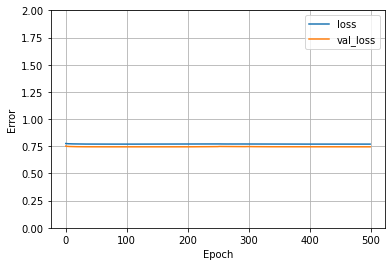

In [243]:
plot_loss(H)

In [245]:
from sklearn.externals.joblib import dump, load

model.save('/content/drive/My Drive/RetouchML/models/normalised.keras')
dump(scaler, '/content/drive/My Drive/RetouchML/models/label_scaler.bin', compress=True)

['/content/drive/My Drive/RetouchML/models/label_scaler.bin']